# 组群发现实例

In [30]:
import networkx as nx
import pandas as pd
import community
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
edge_stackoverflow = pd.read_csv('stackoverflow_edges.csv')

In [32]:
print(edge_stackoverflow.head(10))

             source target      value
0             azure   .net  20.933192
1        sql-server   .net  32.322524
2           asp.net   .net  48.407030
3  entity-framework   .net  24.370903
4               wpf   .net  32.350925
5              linq   .net  20.501744
6               wcf   .net  28.074400
7                c#   .net  62.167895
8               tdd  agile  37.146590
9       codeigniter   ajax  23.191900


In [33]:
G_stackflow = nx.from_pandas_edgelist(edge_stackoverflow)
G_stackflow

## 画图

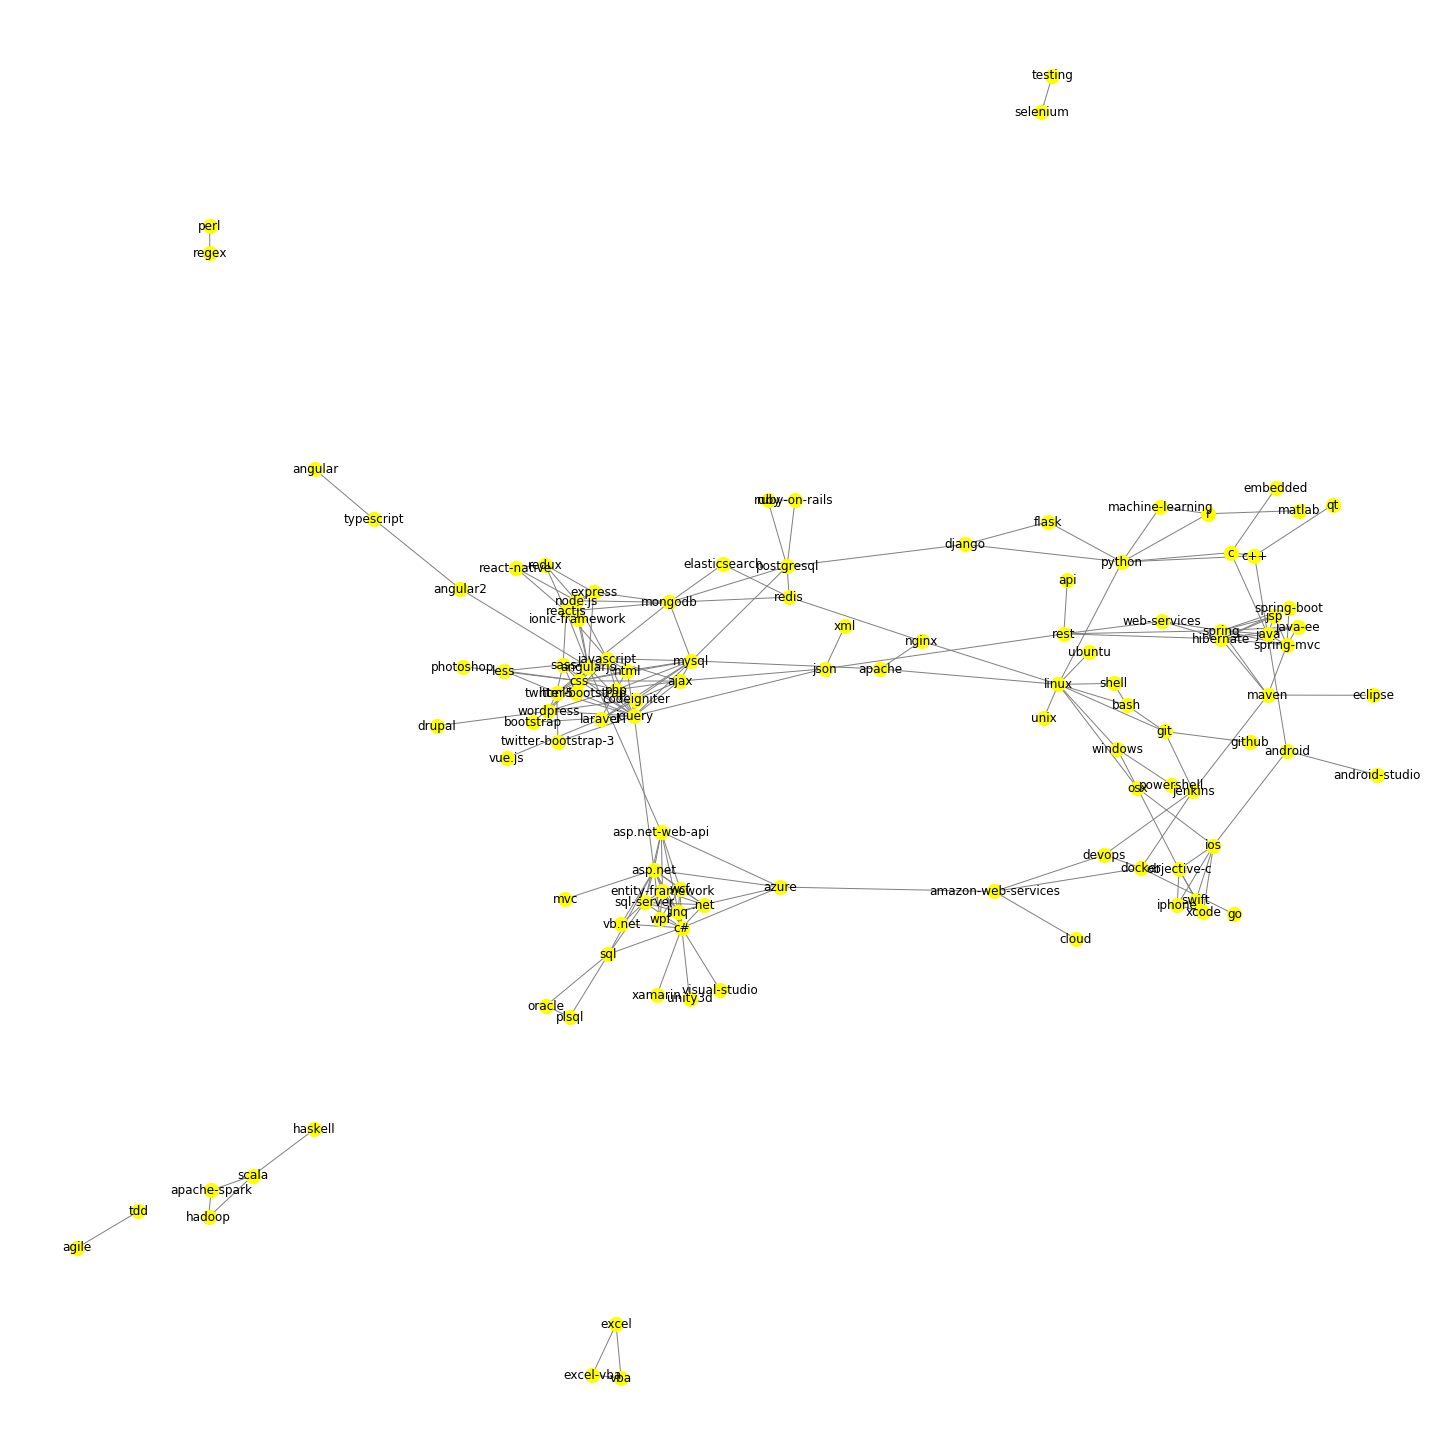

In [34]:

plt.figure(figsize=(20,20))
nx.draw(G_stackflow,with_labels=True,edge_color='gray',node_color='yellow',
        node_size=200,pos=nx.spring_layout(G_stackflow,k=0.2,iterations=100))
#pos=布局指定节点排列形式
#spring_layout： 用Fruchterman-Reingold算法排列节点（多中心放射状）
#k:放大缩小的倍数

In [35]:
parts_stackoverflow = community.best_partition(G_stackflow) #Louvain启发式算法计算图节点的分区
parts_stackoverflow

{'.net': 0,
 'agile': 1,
 'ajax': 2,
 'amazon-web-services': 3,
 'android': 4,
 'android-studio': 4,
 'angular': 6,
 'angular2': 6,
 'angularjs': 6,
 'apache': 7,
 'apache-spark': 8,
 'api': 5,
 'asp.net': 0,
 'asp.net-web-api': 0,
 'azure': 0,
 'bash': 7,
 'bootstrap': 2,
 'c': 5,
 'c#': 0,
 'c++': 5,
 'cloud': 3,
 'codeigniter': 2,
 'css': 2,
 'devops': 3,
 'django': 9,
 'docker': 3,
 'drupal': 2,
 'eclipse': 5,
 'elasticsearch': 6,
 'embedded': 5,
 'entity-framework': 0,
 'excel': 10,
 'excel-vba': 10,
 'express': 6,
 'flask': 9,
 'git': 7,
 'github': 7,
 'go': 3,
 'hadoop': 8,
 'haskell': 8,
 'hibernate': 5,
 'html': 2,
 'html5': 2,
 'ionic-framework': 6,
 'ios': 4,
 'iphone': 4,
 'java': 5,
 'java-ee': 5,
 'javascript': 2,
 'jenkins': 3,
 'jquery': 2,
 'json': 2,
 'jsp': 5,
 'laravel': 2,
 'less': 2,
 'linq': 0,
 'linux': 7,
 'machine-learning': 9,
 'matlab': 9,
 'maven': 5,
 'mongodb': 6,
 'mvc': 0,
 'mysql': 2,
 'nginx': 7,
 'node.js': 6,
 'objective-c': 4,
 'oracle': 0,
 'osx':

In [36]:
# 得到不同soure的communities numbered列表
values = [parts_stackoverflow.get(node) for node in G_stackflow.nodes()]
values

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 2,
 6,
 6,
 0,
 2,
 7,
 7,
 7,
 8,
 8,
 8,
 5,
 5,
 0,
 0,
 0,
 7,
 7,
 7,
 2,
 5,
 5,
 9,
 5,
 0,
 0,
 0,
 5,
 2,
 2,
 2,
 2,
 2,
 3,
 9,
 9,
 6,
 3,
 2,
 5,
 5,
 6,
 6,
 10,
 10,
 10,
 6,
 7,
 8,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 4,
 4,
 4,
 4,
 4,
 2,
 2,
 7,
 7,
 7,
 9,
 9,
 9,
 6,
 0,
 0,
 11,
 11,
 6,
 6,
 7,
 12,
 12]

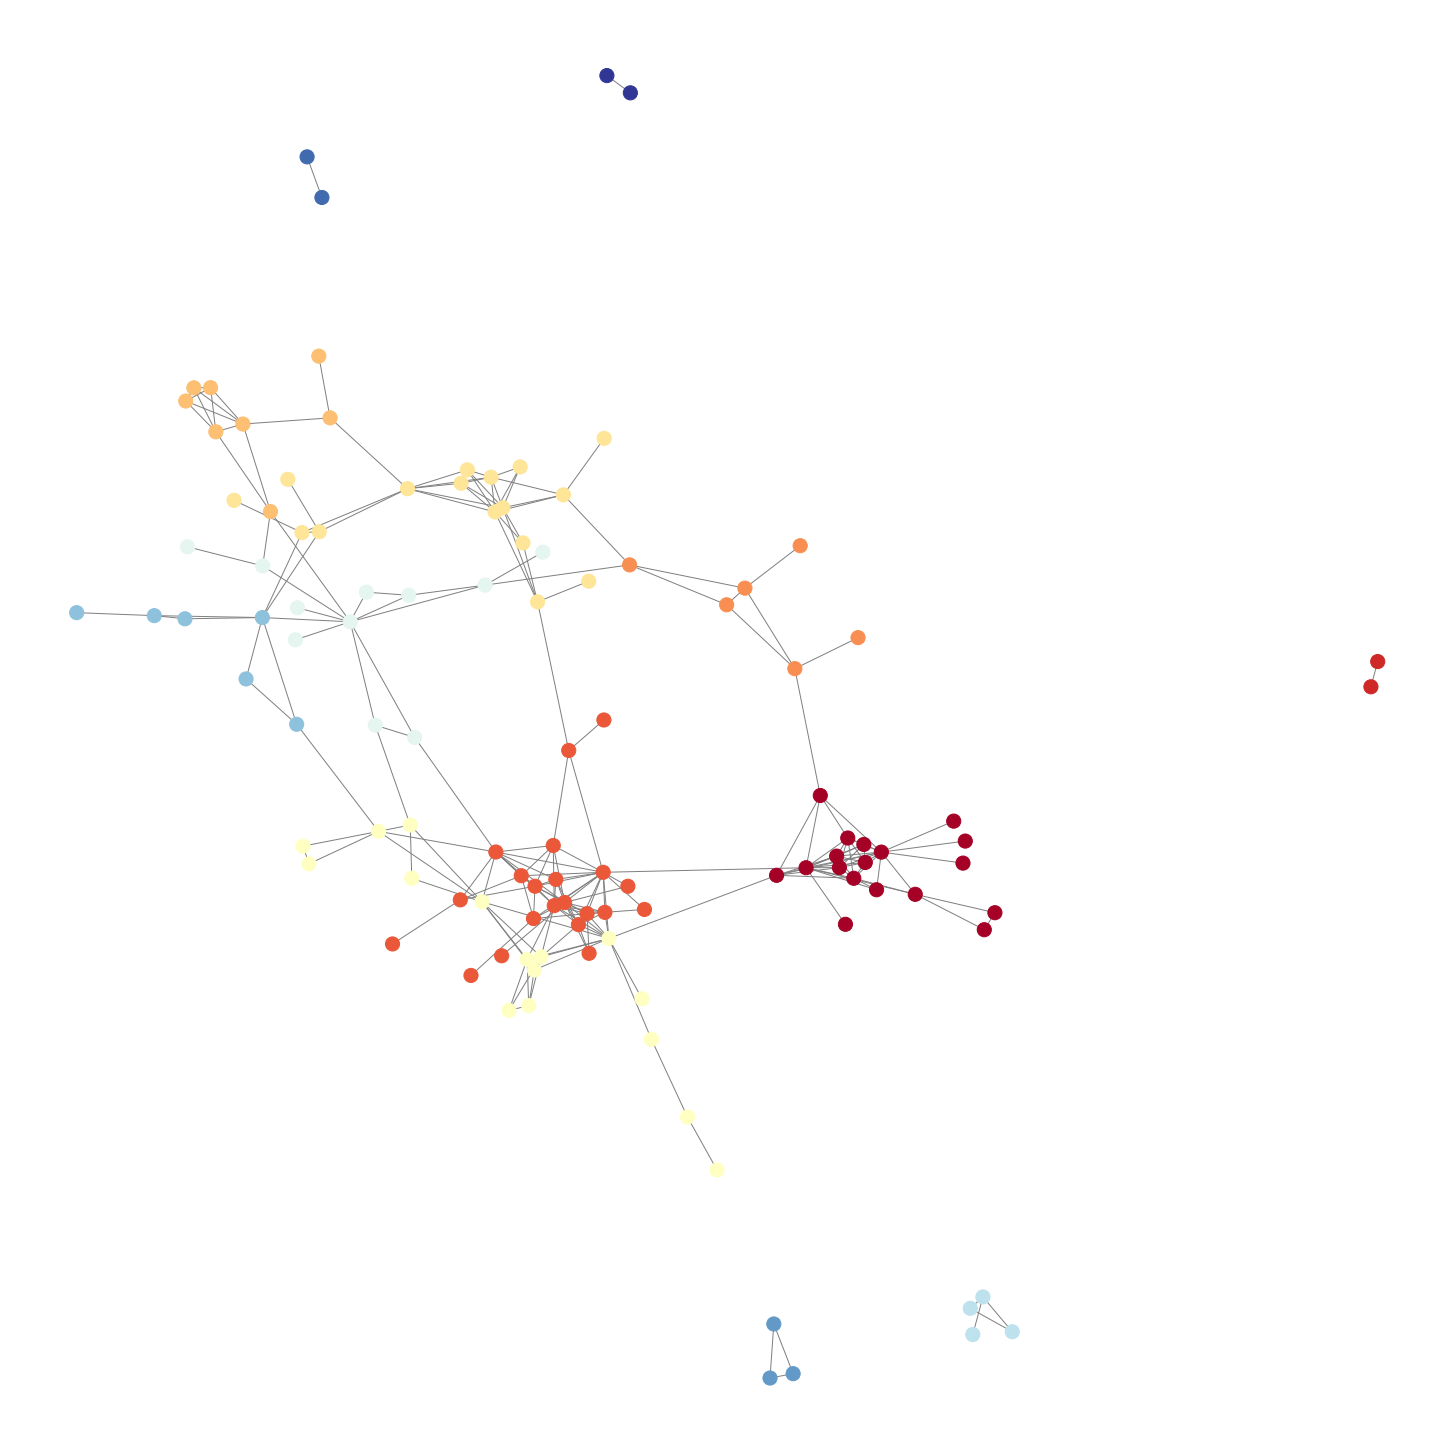

In [37]:
# 对不同communities numbered 的node 进行不同着色
plt.figure(figsize=(20,20))
nx.draw(G_stackflow,cmap = plt.cm.RdYlBu,node_color=values,
       with_label = True,edge_color = 'gray',node_size=200,
       pos=nx.spring_layout(G_stackflow,k=0.2,iterations=100))

In [38]:
edge_list_email = pd.read_csv('email-Eu-core.txt',sep=' ',names=["source","target"])
edge_list_email.head()

,source,target
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [39]:
len(edge_list_email)

25571

In [40]:
G_email = nx.from_pandas_edgelist(edge_list_email)
G_email

In [41]:
node_list = pd.read_csv('email-Eu-core-department-labels.txt',sep=' ',names=["node","department"])
node_list.head()

,node,department
0,0,1
1,1,1
2,2,21
3,3,21
4,4,21


In [42]:
values = [node_list.iloc[node]['department'] for node in G_email.nodes()]

In [43]:
plt.figure(figsize=(20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

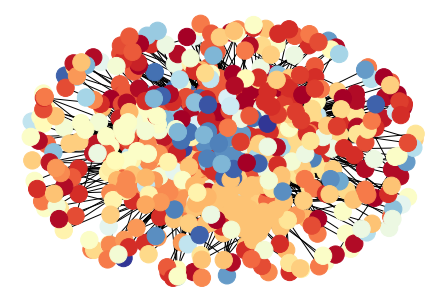

In [53]:
nx.draw(G_email,cmap = plt.cm.RdYlBu,node_color=values,
       with_label = True,pos=nx.spring_layout(G_email,k=0.6,iterations=100))

In [45]:
parts = community.best_partition(G_email)
node_list['detected_community']=list(parts.values())
node_list.head(10)

,node,department,detected_community
0,0,1,0
1,1,1,0
2,2,21,1
3,3,21,1
4,4,21,1
5,5,25,1
6,6,25,1
7,7,14,2
8,8,14,2
9,9,14,2


In [46]:
len(node_list['department'].unique()) # 42个部门

42

In [47]:
len(node_list['detected_community'].unique()) #28个组群

28

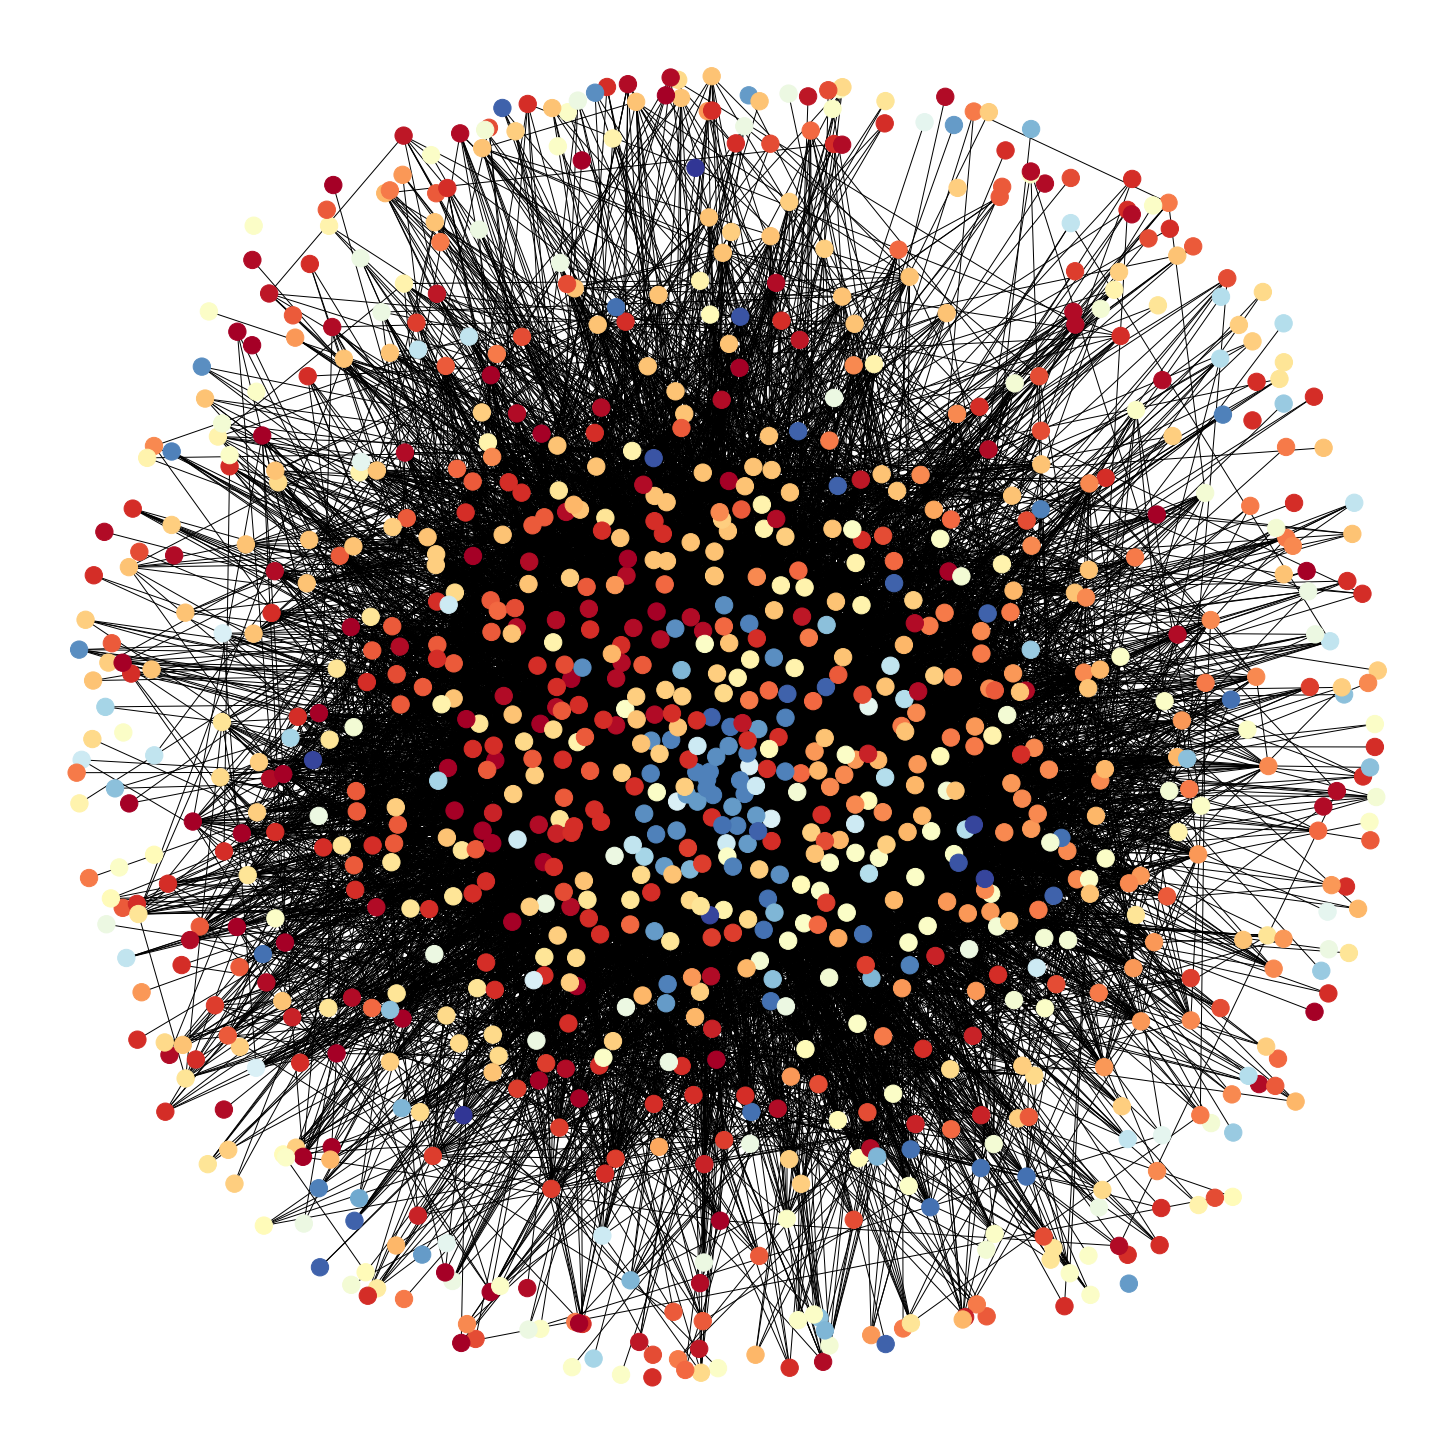

In [48]:
plt.figure(figsize=(20,20))
values = [node_list.iloc[node]['department'] for node in G_email.nodes()]
nx.draw(G_email,cmap = plt.cm.RdYlBu,node_color=values,
       with_label = True,pos=nx.spring_layout(G_email,k=0.6,iterations=50))

In [49]:
node_list.groupby('department').count()

,node,detected_community
department,,
0,49,49
1,65,65
2,10,10
3,12,12
4,109,109
5,18,18
6,28,28
7,51,51
8,19,19


In [50]:
community_nodes = node_list.loc[node_list['detected_community']==2]
community_nodes

,node,department,detected_community
7,7,14,2
8,8,14,2
9,9,14,2
11,11,14,2
12,12,14,2
...,...,...,...
967,967,14,2
971,971,32,2
973,973,14,2
975,975,9,2


In [51]:
community_nodes.groupby('department').count()

,node,detected_community
department,,
9,1,1
14,88,88
15,1,1
32,1,1


In [52]:
department_statistics = community_nodes.groupby('department').count()
department_statistics['node'].sum()

91